In [25]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
# Build a regression model to how predict price of cars from data set (linear regression)
file_path = '/Users/samuelrouse/Downloads/cardekho.csv'
df = pd.read_csv(file_path)

In [27]:
# Iniutal checking and preprocessing of the data
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.5,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.1,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.1,5.0


In [28]:
# info
print(df.shape)
print(df.columns)

(8128, 12)
Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')


In [29]:
# more info
print(df.info())
print('\n')
print(df.describe())
print('\n')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB
None


              year  selling_price     km_driven  mileage(km/ltr/kg)  \
count  8128.000000   8.128000e+03  8.128000e+03         7907.0000

In [30]:
# missing cols
cols = ['mileage(km/ltr/kg)', 'engine', 'max_power', 'seats'] 

for i in cols:
    print(f'value count for {i}:')
    print(df[i].value_counts(dropna=False))
    print()

value count for mileage(km/ltr/kg):
mileage(km/ltr/kg)
18.90    225
NaN      221
19.70    173
18.60    164
21.10    158
        ... 
17.42      1
18.24      1
10.71      1
21.76      1
16.51      1
Name: count, Length: 382, dtype: int64

value count for engine:
engine
1248.0    1017
1197.0     832
998.0      453
796.0      444
2179.0     389
          ... 
2835.0       1
1489.0       1
1422.0       1
2496.0       1
1950.0       1
Name: count, Length: 122, dtype: int64

value count for max_power:
max_power
74        377
88.5      222
81.8      220
NaN       215
67        165
         ... 
68.4        1
169         1
170.63      1
149.5       1
135.1       1
Name: count, Length: 321, dtype: int64

value count for seats:
seats
5.0     6254
7.0     1120
8.0      236
NaN      221
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64



In [31]:
# Calculate the percentage of missing values for each column
missing_percentage = df[cols].isnull().mean() * 100

# Display the percentage of missing values
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

# quite small amount only around 2.6%-2.8% of each one is null

Percentage of Missing Values in Each Column:
mileage(km/ltr/kg)    2.718996
engine                2.718996
max_power             2.645177
seats                 2.718996
dtype: float64


In [32]:
# Get rows with null values in any of the specified columns
rows_with_nulls = df[df[cols].isnull().any(axis=1)]

# Display the rows with null values
print("Rows with Null Values:")
print(rows_with_nulls.head(10))

Rows with Null Values:
                            name  year  selling_price  km_driven    fuel  \
13          Maruti Swift 1.3 VXi  2007         200000      80000  Petrol   
31            Fiat Palio 1.2 ELX  2003          70000      50000  Petrol   
78               Tata Indica DLS  2003          50000      70000  Diesel   
87   Maruti Swift VDI BSIV W ABS  2015         475000      78000  Diesel   
119        Maruti Swift VDI BSIV  2010         300000     120000  Diesel   
138      BMW X1 sDrive 20D xLine  2017        2150000      27000  Diesel   
200              Toyota Etios GD  2012         235000     120000  Diesel   
206      Maruti Omni E 8 Str STD  2003          40000      90000  Petrol   
228         Maruti Swift 1.3 VXi  2008         130000     120000  Petrol   
252              Tata Indica DLS  2005          75000     110000  Diesel   

    seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
13   Individual       Manual  Second Owner                 NaN    

In [33]:
#Fill missing values using Mean/Median/Mode
df['mileage(km/ltr/kg)'] = pd.to_numeric(df['mileage(km/ltr/kg)'], errors='coerce')
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df['seats'] = pd.to_numeric(df['seats'], errors='coerce')

df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].median()) # for skewed values
df['engine'] = df['engine'].fillna(df['engine'].mean())
df['max_power'] = df['max_power'].fillna(df['max_power'].mean())
df['seats'] = df['seats'].fillna(df['seats'].mode()[0])

In [34]:
# check there is no more null values
print(df.isnull().sum())

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64


In [35]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [43]:
# As a model for selling price is being predicted I think owner would be corealted so need to change owner column.
# Encode categorical variables
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission'], drop_first=True)

In [44]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)',
       'engine', 'max_power', 'seats', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual'],
      dtype='object')

In [19]:
# # Check the correlation matrix
# numeric_df = df.select_dtypes(include=[np.number])
# correlation_matrix = df.corr()

# # Plot the heatmap of the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()

# # Display correlations of all features with the target variable 'price'
# print(correlation_matrix['price'].sort_values(ascending=False))


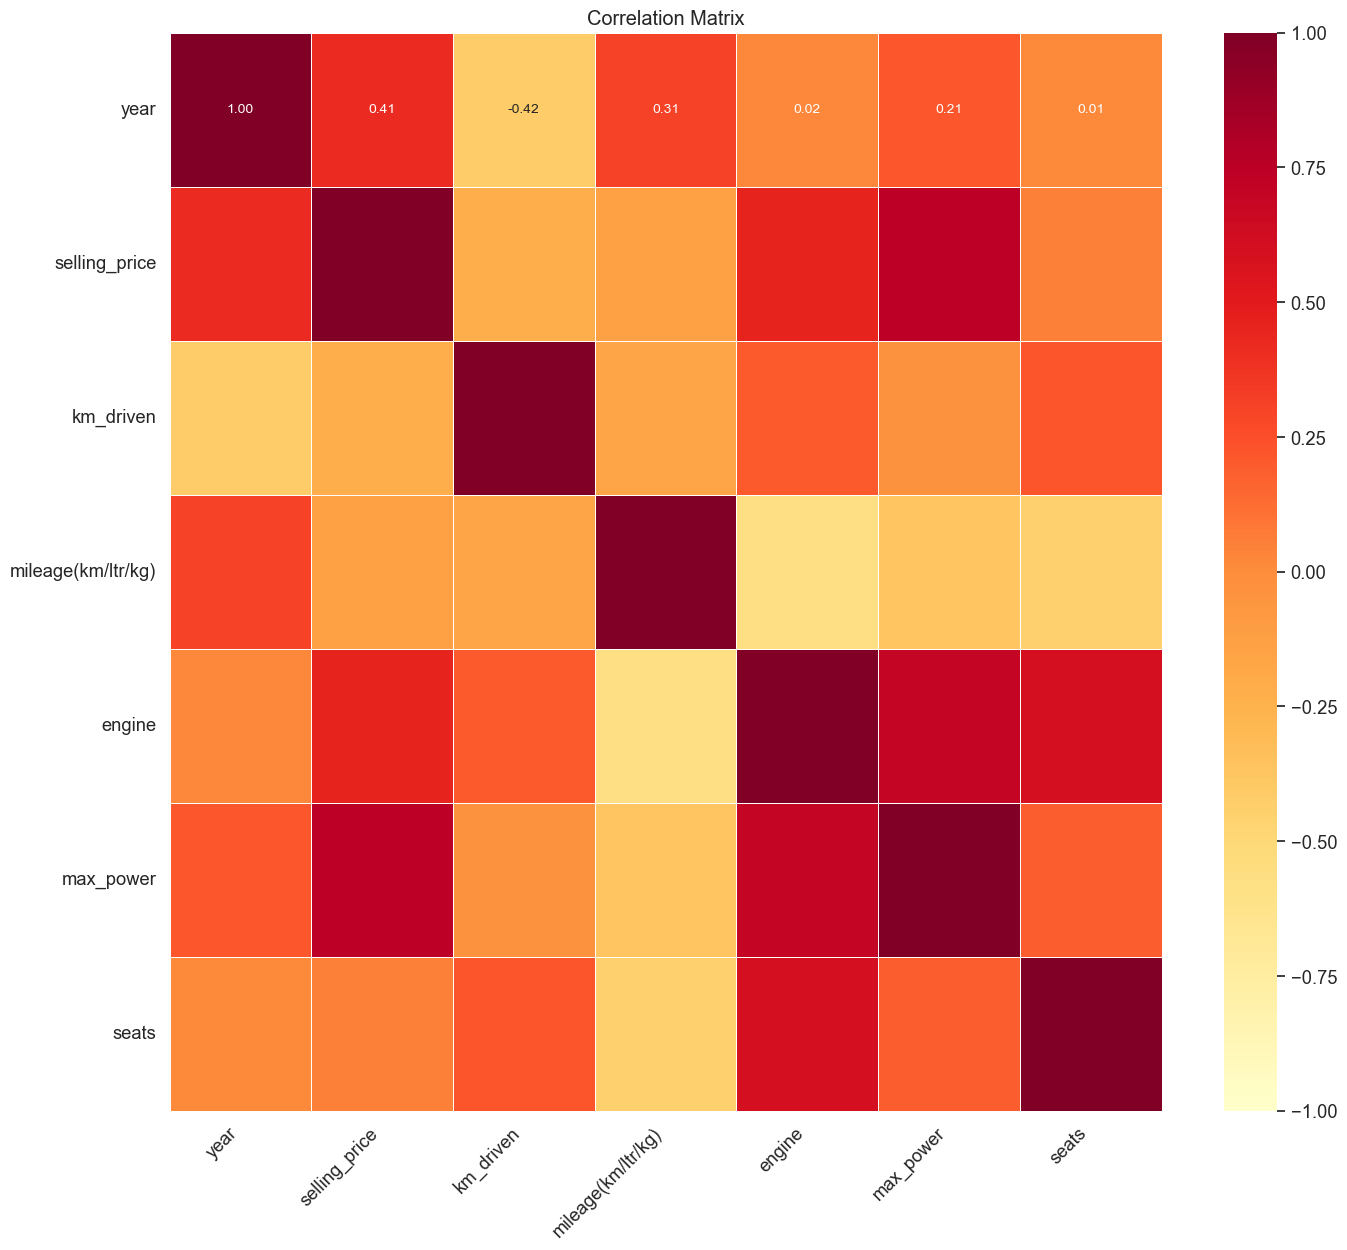

In [45]:

#multi variate analysis
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()


# Plot the heatmap of the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlOrRd', vmin=-1, vmax=1, center=0, linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# dunno why this was un working 

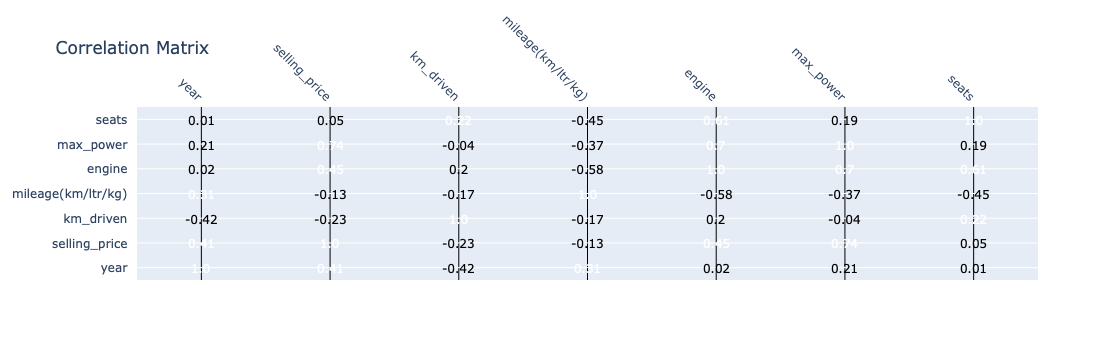

In [46]:
import plotly.express as px
import plotly.figure_factory as ff

# Calculate the correlation matrix
corr_matrix = numeric_df.corr().round(2)

# Create a Plotly heatmap
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.index.tolist(),
    annotation_text=corr_matrix.values,
    colorscale='YlOrRd'
)

fig.update_layout(
    title='Correlation Matrix',
    xaxis=dict(tickangle=45),
    yaxis=dict(tickangle=0)
)

fig.show()

From this heat map (not sure why the first one wasn't showing all values, so created with plotly instead can see the factors highest correlated with selling_price.

In [47]:
df.dtypes

name                             object
year                              int64
selling_price                     int64
km_driven                         int64
mileage(km/ltr/kg)              float64
engine                          float64
max_power                       float64
seats                           float64
owner_Fourth & Above Owner         bool
owner_Second Owner                 bool
owner_Test Drive Car               bool
owner_Third Owner                  bool
fuel_Diesel                        bool
fuel_LPG                           bool
fuel_Petrol                        bool
seller_type_Individual             bool
seller_type_Trustmark Dealer       bool
transmission_Manual                bool
dtype: object

Mean Absolute Error: 270678.4094463562
Mean Squared Error: 198635443136.70627
R² Score: 0.6969639080767858


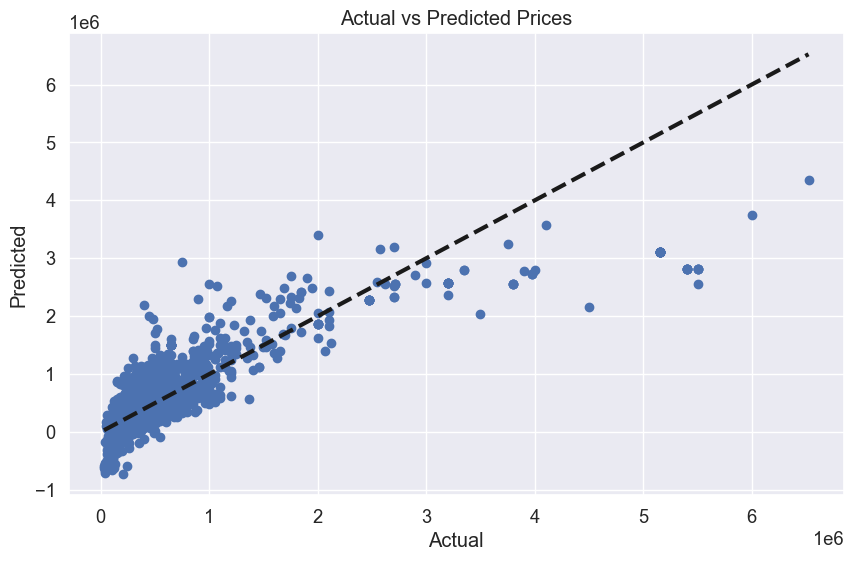

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



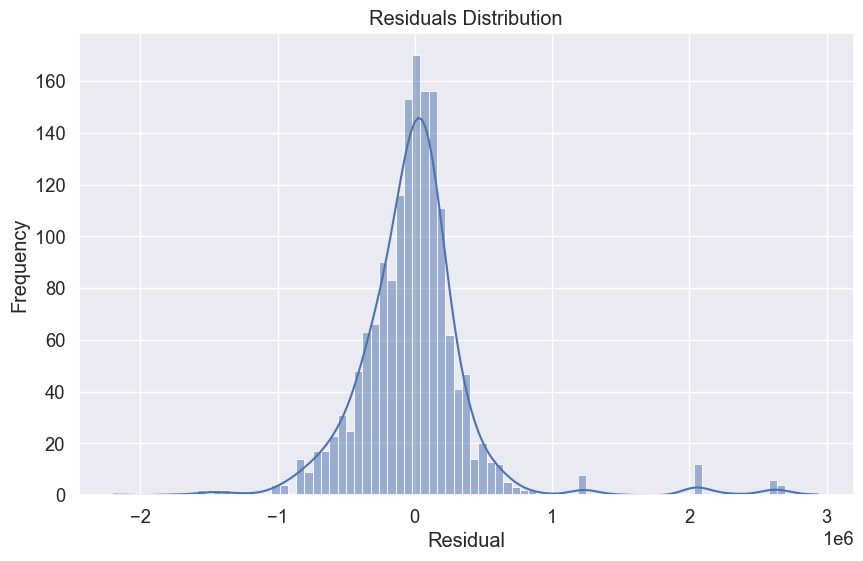

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features (X) and target (y)
X = df.drop(columns=['selling_price', 'name'])  # Drop the target variable
y = df['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()
